# Grafos aletarios
## Modelos y Relaciones
Sea $ \mathcal{G}_{n,m} $ la familia de grafos de n vértices del conjunto $V=[n]= \{ 1,2,3,...,n\}$ y exactamente $m$ aristas, donde $0\leq m \leq {n \choose 2}$

Para todo $G \in \mathcal{G}_{n,m}$ asignamos la siguiente probabilidad
$$ \mathcal{P}(G) = \frac{1}{{n \choose 2} \choose m}$$

Comezaremos con un grafo vacío de $n$ vértices y llenaremos luego las $m$ aristas donde las ${{n \choose 2} \choose m}$ son igualmente probables de ser escogidas. Denotaremos a este modelo **grafo aleatorio uniforme** .

$\mathbb{G}_{n,m}=([n],E_{n,m})$

Equivalentemente, describiremos un modelo similar.

Dado $0\leq p \leq 1$ y comenzanso con un grafo de n vértices vacío, consideramos $p$ como la probabilidad de que cada {{n \choose 2} \choose m} sea escogida. Entonces para $G$ con $m$ aristas y un conjunto de vértices $[n]$ la probabilidad

$$\mathcal{P}(G)= p^{m}. (1-p)^{{\binom{n}{2}-m}}$$

Siguiendo con el modelo del grafo vacío, realizamos $\binom{n}{2}$ experimentos Bernoulli añadiendo aristas independientemente con probabilidad $p$.
A este grafo aleatorio lo llamaremos **grafo aleatorio binomial** y es denotado por:
$$\mathbb{G}_{n,p}=([n],E_{n,p})$$

Notamos entonces que la única diferencia entre estos dos modelos es que en $\mathbb{G}_{n,m}$ escogemos el número de aristas, mientras que en $\mathbb{G}_{n,p}$ las aristas están condicionadas a la variable aleatoria $Binomial(\binom{n}{2},p)$


Los siguientes gráficos simulan el comportamiento de una grafo aleatorio de 10 vértices, donde cada arista tiene probabilidad de ser escogida entre 0 y 1, variando en 0.25.

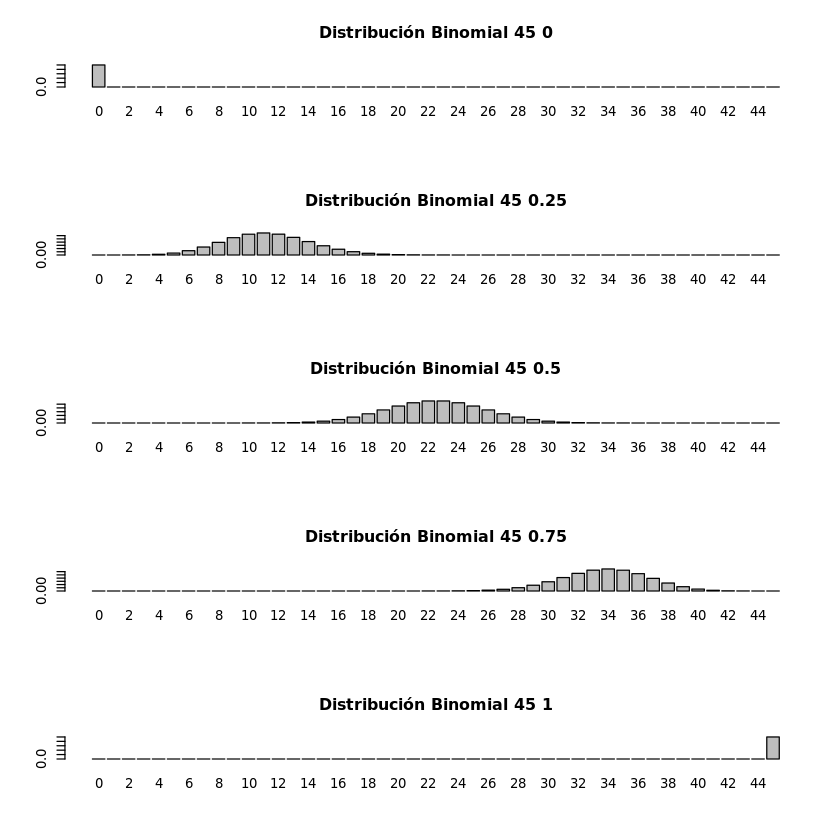

In [1]:
n <- 10
graph <- function(n,p){
    #N es el total de aristas posibles en un grafo n vertices
    N <- choose(n,2)
    #x será el vector que almacene el PMF de la dist. binomial
    x <- dbinom(0:N, size=N, prob=p)
    barplot(x,names.arg=c(0:N), main=sprintf(paste("Distribución Binomial",N,p,sep=" ")))
}
par(mfrow=c(5,1))
graph(n,0.0)
graph(n,0.25)
graph(n,0.50)
graph(n,0.75)
graph(n,1.0)


### Grafo aleatorio Binomial vs. Uniforme

Si bien es cierto que en el grafo aleatorio uniforme nosotros definimos n y m desde el principio, esto no ayuda a a investigación analítica debido a que no posee independencia entre aristas como sí lo hace el grafo aleatorio binomial. De hecho, existe una conexión cerca entre ellos y las propiedades de $\mathcal{G}_{n,m}$ y $\mathcal{G}_{n,p}$ son muy similares en el caso de $m=\binom{n}{2}p$


#### Propiedades de $\mathcal{G}_{n,m}$
* La media del número de aristas en $\mathcal{G}_{n,p}$ es $\binom{n}{2}p$. Podemos llegar a este resultado notando que la distribución de numero de aristas $X$ en $\mathcal{G}_{n,p}$ es binomial con parametros $\binom{n}{2}$ y $p$.

 $$\mathcal{P}(X=k)=\binom{n}{2}p^{m}. (1-p)^{{\binom{n}{2}-m}}$$

 Y recordamos la media de una distribución binomial.
* La distribución que la r.v. que toma el valor del grado para cualquier vértice en $\mathcal{G}_{n,p}$ es binomial con parámetros $n-1$ y $p$. Es decir si $D_{i}$ es la variable aleatoria que denota el grado de un vértice $i$, luego
    $$ \mathcal{P}(D_{i}=k)=\binom{n-1}{k}p^{k}. (1-p)^{k-1}$$ 
    Un detalle importante que debemos tomar en cuenta es que para dos diferente vértices $i$ y $j$ y las variables aleatorias $D_{i}$ y $D_{j}$ no son precisamente independientes pues si $D_{i}=n-1$ entonces es claro que $D_{j} \neq 0$ . Sin embargo, considerando n un número mu grande, se puede decir que son independientes y podríamos asumir que la distribución de grados se comporta como binomial. A partir de este resultado, podemos entonces aproximar la distribución binomial a Poisson en el caso $np \rightarrow \lambda$

## Triángulos en grafos aleatorios Erdös-Rényi

Consideraremos un ejemplo para llegar a la esencia de lo que pasa en estos grafos.
Denotemos $T_{3,n}$ la variable aleatoria en el espacio $\mathcal{G}_{n,m}$ el cual es el número de triágulos en un grafo aleatorio. Por ejemplo, $T_{3,n}(K_{n})=\binom{n}{3}$ y para cualquier grafo $G$ con solo dos aristas $T_{3,n}=0$ 

**Definición**
Un evento que ocurre *with high probability(whp)* es decir, con alta probabilidad es aquel que depende solo de un nùmero n y cuando $n \rightarrow \infty$ entonces $p \rightarrow 1$.

**Teorema: Método primer momento**
Sea $X\_{n} \geq 0 $ una variable aleatoria de valor entero. Si $E(X\_{n}) \rightarrow 0$ entonces $X\_{n} = 0$ **whp** como $n \rightarrow \infty$

*Prueba.* Partiendo de la desigualdad de Markov $P(X \geq 1) \leq E(X)$



Hay por lo menos dos razones porque el modelo binomial $\mathcal{G}_{n,p}$  no es útil para visualizar el diseño de los algortimos en grafos. Primero, como ocurre con el framework de análisis de casos puros, el modelo de datos es demasiado específico. Segundo, como veremos en los siguientes dos ejemplos,no llega a diferenciarse significativamente entre diferentes algoritmos.

### Ejemplo 1. Corte mínimo

Este problema comienza definiendo un corte $S$  de un grafo $G=(V,E)$como un sub-grafo $S \subset V$ no vacío. El tamalo del corte con respecto a S es el número de aristas entre S y el resto del grafo $\acute{S}= V\\S$

### Ejemplo 2. Bisección mínima

